
Code adapted from example provided in:
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [ ]:
!pip install skl2onnx

In [ ]:
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from google.colab import drive
from skl2onnx import to_onnx

drive.mount('/content/drive/')
path = 'replace with path to folder with data files/' #Defining the path

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
columnNames = ['CH1','LABEL']
csvData = pd.read_csv(path+'SensorData.csv',names=columnNames)

sensors = ['CH1'] # The channel containing sensor data, i.e. the independent variables
x = csvData[sensors]  # The independent variables (i.e. the EMG signals) from each channel that reflect either rest or muscle activation
y = csvData.LABEL # The dependent variable, which states whether the corresponding data is 'positive' or 'negative'

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  # Splits up the data into training and testing groups

In [ ]:
# Creates the MLP neural network
# Code based on documentation example: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
clf = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(5,2),max_iter=500)
clf.fit(x_train,y_train)  # Trains the MLP neural network on the training data

# This block of code saves the model to an ONNX file in the same drive folder as the data files.
# Code based on documentation example:  https://onnx.ai/sklearn-onnx/index.html
onx = to_onnx(clf, x[:1])
with open(path+"nnetwork.onnx", "wb") as f:
    f.write(onx.SerializeToString())

Accuracy: 0.818773032733579


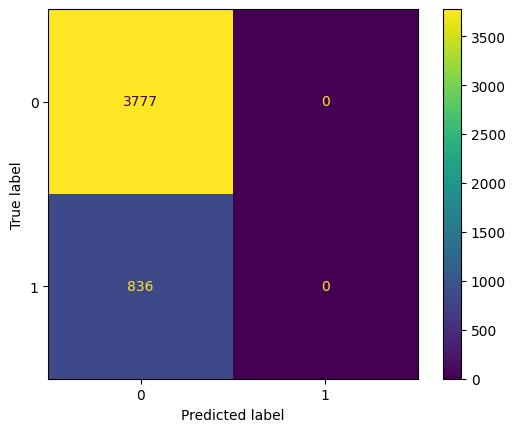

In [ ]:
y_pred = clf.predict(x_test)  # Test the data against the test dataset

cf = confusion_matrix(y_test, y_pred, labels=clf.classes_)  # Creates a confusion matrix object using the test results
conf_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = clf.classes_) # Loads the confusion matrix into a display

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Displays the accuracy of the model
conf_display.plot() # Plots the confusion matrix